In [4]:
%tensorflow_version 2.x
import tensorflow as tf
import timeit

In [5]:
import pandas as pd
from pandas.testing import assert_frame_equal
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['patch.force_edgecolor'] = True
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [8]:
filepath = 'https://raw.githubusercontent.com/Areefahnk/Eagle-s-Eye-On-Cybercrime/master/twitterbotdataset.csv'
file= filepath

training_data = pd.read_csv(file)


In [9]:
training_data.shape

(2797, 20)

In [10]:
training_data.columns

Index(['id', 'id_str', 'screen_name', 'location', 'description', 'url',
       'followers_count', 'friends_count', 'listed_count', 'created_at',
       'favourites_count', 'verified', 'statuses_count', 'lang', 'status',
       'default_profile', 'default_profile_image', 'has_extended_profile',
       'name', 'bot'],
      dtype='object')

In [11]:
training_data.info

<bound method DataFrame.info of                 id                id_str  ...                  name bot
0     8.160000e+17  "815745789754417152"  ...  "Houston PokŽ Alert"   1
1     4.843621e+09            4843621225  ...           Keri Nelson   1
2     4.303727e+09            4303727112  ...    Matt Lieber Is Bot   1
3     3.063139e+09            3063139353  ...    single cell papers   1
4     2.955142e+09            2955142070  ...          lucarivera16   1
...            ...                   ...  ...                   ...  ..
2792  2.362091e+08             236209129  ...        Leslie Berland   0
2793  2.545039e+08             254503881  ...    Samuel Littlefield   0
2794  1.548544e+07              15485441  ...          jimmy fallon   0
2795  7.513869e+08             751386872  ...        Tammas Foxdene   0
2796  1.992936e+07              19929362  ...            Joe Barton   0

[2797 rows x 20 columns]>

In [12]:
bots = training_data[training_data.bot==1]
nonbots = training_data[training_data.bot==0]

In [13]:
bots.shape

(1321, 20)

In [14]:
nonbots.shape

(1476, 20)

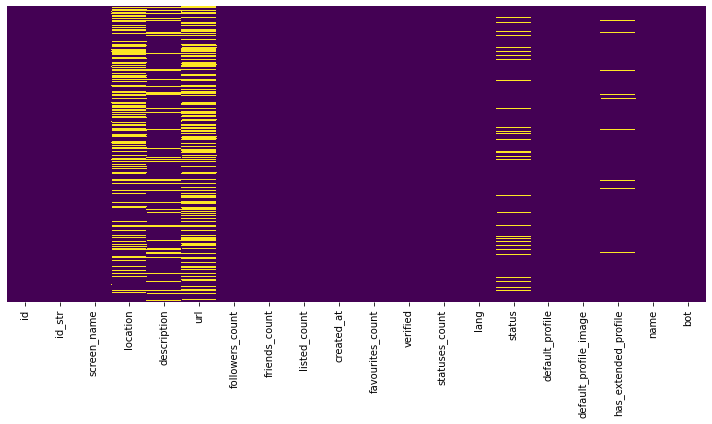

In [15]:
def get_heatmap(df):
    #This function gives heatmap of all NaN values
    plt.figure(figsize=(10,6))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.tight_layout()
    return plt.show()

get_heatmap(training_data)

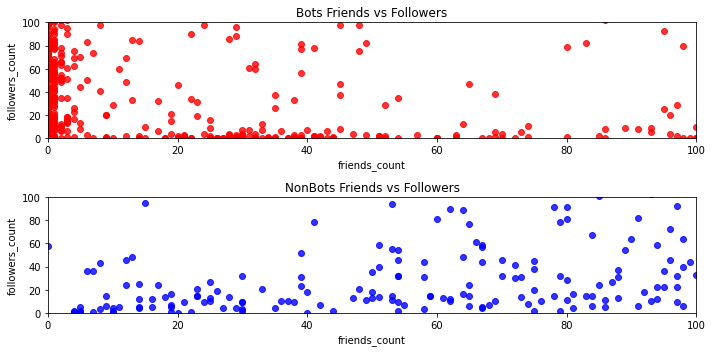

In [16]:
bots.friends_count/bots.followers_count

plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
plt.title('Bots Friends vs Followers')
sns.regplot(bots.friends_count, bots.followers_count, color='red', label='Bots')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.tight_layout()

plt.subplot(2,1,2)
plt.title('NonBots Friends vs Followers')
sns.regplot(nonbots.friends_count, nonbots.followers_count, color='blue', label='NonBots')
plt.xlim(0, 100)
plt.ylim(0, 100)

plt.tight_layout()
plt.show()

In [17]:
bots['friends_by_followers'] = bots.friends_count/bots.followers_count
bots[bots.friends_by_followers<1].shape

nonbots['friends_by_followers'] = nonbots.friends_count/nonbots.followers_count
nonbots[nonbots.friends_by_followers<1].shape

(952, 21)

(504, 21)


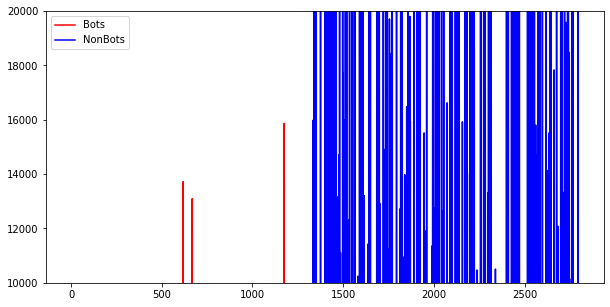

In [18]:
plt.figure(figsize=(10,5))
plt.plot(bots.listed_count, color='red', label='Bots')
plt.plot(nonbots.listed_count, color='blue', label='NonBots')
plt.legend(loc='upper left')
plt.ylim(10000,20000)
print(bots[(bots.listed_count<5)].shape)

In [20]:
bots_listed_count_df = bots[bots.listed_count<16000]
nonbots_listed_count_df = nonbots[nonbots.listed_count<16000]

bots_verified_df = bots_listed_count_df[bots_listed_count_df.verified==False]
bots_screenname_has_bot_df_ = bots_verified_df[(bots_verified_df.screen_name.str.contains("bot", case=False)==True)].shape

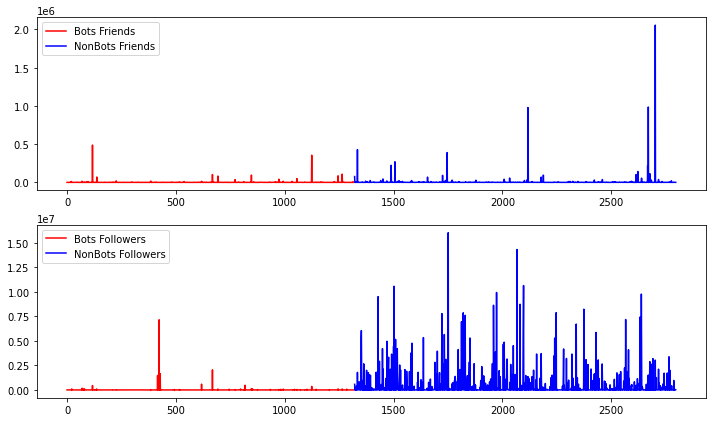

In [21]:
plt.figure(figsize=(12,7))

plt.subplot(2,1,1)
plt.plot(bots_listed_count_df.friends_count, color='red', label='Bots Friends')
plt.plot(nonbots_listed_count_df.friends_count, color='blue', label='NonBots Friends')
plt.legend(loc='upper left')

plt.subplot(2,1,2)
plt.plot(bots_listed_count_df.followers_count, color='red', label='Bots Followers')
plt.plot(nonbots_listed_count_df.followers_count, color='blue', label='NonBots Followers')
plt.legend(loc='upper left')

In [22]:
#bots[bots.listedcount>10000]
condition = (bots.screen_name.str.contains("bot", case=False)==True)|(bots.description.str.contains("bot", case=False)==True)|(bots.location.isnull())|(bots.verified==False)

bots['screen_name_binary'] = (bots.screen_name.str.contains("bot", case=False)==True)
bots['location_binary'] = (bots.location.isnull())
bots['verified_binary'] = (bots.verified==False)
bots.shape

(1321, 24)

In [23]:
bots.info

<bound method DataFrame.info of                 id                id_str  ... location_binary verified_binary
0     8.160000e+17  "815745789754417152"  ...           False            True
1     4.843621e+09            4843621225  ...           False            True
2     4.303727e+09            4303727112  ...            True            True
3     3.063139e+09            3063139353  ...            True            True
4     2.955142e+09            2955142070  ...           False            True
...            ...                   ...  ...             ...             ...
1316  3.299611e+09            3299611091  ...            True            True
1317  7.450000e+17              7.45E+17  ...            True            True
1318  2.598999e+09            2598999212  ...            True            True
1319  2.386845e+09            2386845055  ...           False            True
1320  8.130000e+17              8.13E+17  ...            True            True

[1321 rows x 24 columns]>

In [24]:
condition = (nonbots.screen_name.str.contains("bot", case=False)==False)| (nonbots.description.str.contains("bot", case=False)==False) |(nonbots.location.isnull()==False)|(nonbots.verified==True)

nonbots['screen_name_binary'] = (nonbots.screen_name.str.contains("bot", case=False)==False)
nonbots['location_binary'] = (nonbots.location.isnull()==False)
nonbots['verified_binary'] = (nonbots.verified==True)

nonbots.shape

(1476, 24)

In [25]:
df = pd.concat([bots, nonbots])
df.shape

(2797, 24)

In [26]:
df.corr(method='spearman')

,id,followers_count,friends_count,listed_count,favourites_count,verified,statuses_count,default_profile,default_profile_image,bot,friends_by_followers,screen_name_binary,location_binary,verified_binary
id,1.000000,-0.672925,-0.402346,-0.615005,-0.439430,-0.611899,-0.451945,0.522990,0.166601,0.652131,0.270435,-0.576100,-0.228328,0.150100
followers_count,-0.672925,1.000000,0.375522,0.896126,0.457363,0.709732,0.649117,-0.496899,-0.293838,-0.468430,-0.577157,0.458213,0.189675,0.130717
friends_count,-0.402346,0.375522,1.000000,0.204403,0.641529,0.356452,0.111118,-0.296358,-0.097607,-0.483105,0.427638,0.342145,0.082692,-0.210592
listed_count,-0.615005,0.896126,0.204403,1.000000,0.349059,0.694340,0.684976,-0.447376,-0.269035,-0.318445,-0.681034,0.338698,0.188797,0.281360
favourites_count,-0.439430,0.457363,0.641529,0.349059,1.000000,0.394227,0.295108,-0.348043,-0.226956,-0.526228,0.104797,0.408864,0.120941,-0.220894
verified,-0.611899,0.709732,0.356452,0.694340,0.394227,1.000000,0.333278,-0.404650,-0.132298,-0.508555,-0.419815,0.434177,0.191922,0.346505
statuses_count,-0.451945,0.649117,0.111118,0.684976,0.295108,0.333278,1.000000,-0.375918,-0.289999,-0.089018,-0.533971,0.162213,0.105333,0.207384
default_profile,0.522990,-0.496899,-0.296358,-0.447376,-0.348043,-0.404650,-0.375918,1.000000,0.246979,0.407748,0.197929,-0.377572,-0.138378,0.072351
default_profile_image,0.166601,-0.293838,-0.097607,-0.269035,-0.226956,-0.132298,-0.289999,0.246979,1.000000,0.139669,0.190986,-0.166388,0.000596,0.033021
bot,0.652131,-0.468430,-0.483105,-0.318445,-0.526228,-0.508555,-0.089018,0.407748,0.139669,1.000000,-0.044056,-0.843429,-0.266342,0.606771


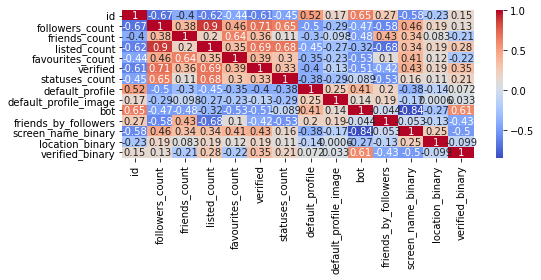

In [27]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(method='spearman'), cmap='coolwarm', annot=True)
plt.tight_layout()
plt.show()

In [28]:
#filepath = 'C://Users/AREEFA/Desktop/training_data_2_csv_UTF.csv'
#file= open(filepath, mode='r', encoding='utf-8', errors='ignore')
filepath = 'https://raw.githubusercontent.com/Areefahnk/Eagle-s-Eye-On-Cybercrime/master/twitterbotdataset.csv'
file= filepath
#import codecs
#f = codecs.open(file, mode='r',encoding='utf-8',errors = 'ignore')
training_data = pd.read_csv(file)

In [29]:
bag_of_words_bot = r'bot|b0t|cannabis|tweet me|mishear|follow me|updates every|gorilla|yes_ofc|forget' \
                    r'expos|kill|clit|bbb|butt|fuck|XXX|sex|truthe|fake|anony|free|virus|funky|RNA|kuck|jargon' \
                    r'nerd|swag|jack|bang|bonsai|chick|prison|paper|pokem|xx|freak|ffd|dunia|clone|genie|bbb' \
                    r'ffd|onlyman|emoji|joke|troll|droop|free|every|wow|cheese|yeah|bio|magic|wizard|face'
            
training_data['screen_name_binary'] = training_data.screen_name.str.contains(bag_of_words_bot, case=False, na=False)
training_data['name_binary'] = training_data.name.str.contains(bag_of_words_bot, case=False, na=False)
training_data['description_binary'] = training_data.description.str.contains(bag_of_words_bot, case=False, na=False)
training_data['status_binary'] = training_data.status.str.contains(bag_of_words_bot, case=False, na=False)

In [30]:
training_data['listed_count_binary'] = (training_data.listed_count>20000)==False
features = ['screen_name_binary', 'name_binary', 'description_binary', 'status_binary', 'verified', 'followers_count', 'friends_count', 'statuses_count', 'listed_count_binary', 'bot']


In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split

X = training_data[features].iloc[:,:-1]
y = training_data[features].iloc[:,-1]  ##last column

dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=50, min_samples_split=10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_train.shape

dt = dt.fit(X_train, y_train)
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

print("Trainig Accuracy: %.5f" %accuracy_score(y_train, y_pred_train))
print("Test Accuracy: %.5f" %accuracy_score(y_test, y_pred_test))


Trainig Accuracy: 0.88707
Test Accuracy: 0.87857


In [32]:
X_test

,screen_name_binary,name_binary,description_binary,status_binary,verified,followers_count,friends_count,statuses_count,listed_count_binary
2409,False,False,False,False,False,32,54,16,True
416,False,False,True,False,False,1474799,1,20990,True
1193,False,False,False,False,False,2,492,79,True
1970,False,False,True,False,False,5273,293,6636,True
1854,False,False,False,True,True,5766,333,358,True
...,...,...,...,...,...,...,...,...,...
1208,False,False,False,False,False,1,253,26,True
1834,False,False,False,False,False,1780,820,1827,True
1932,False,False,False,False,True,513333,243,1707,True
213,True,False,True,True,False,6027,0,116980,True


Cross Validation

Using TensorFlow backend.


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


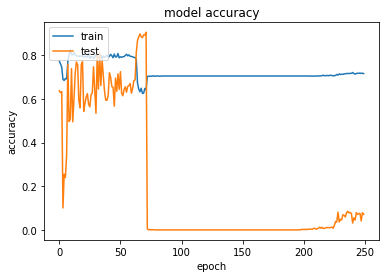

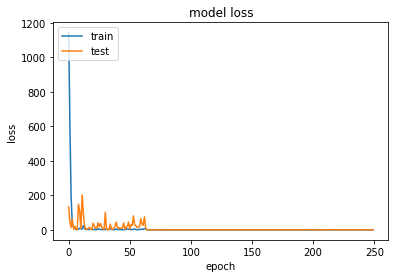

In [34]:
import matplotlib.pyplot as plt
import numpy
import keras.models
import tensorflow
seed = 7
from keras.models import Sequential
from keras.layers import Activation, Dense
numpy.random.seed(seed)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split

X = training_data[features].iloc[:,:-1]
y = training_data[features].iloc[:,-1]  ##last column

# create model
model = Sequential()
model.add(Dense(12, input_dim=9, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X, y, validation_split=0.33, epochs=250, batch_size=10, verbose=0)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#scores = model.evaluate(X,y)
#print("%s: %s" % (model.metrics_names[1], scores[1]*100))